# Loading the dataset

In [45]:
import pandas as pd
import os

In [46]:
path = 'static/dataset/spam.csv'

In [47]:
df = pd.read_csv(path, encoding='Windows-1252')

# Exploring the dataset
<hr>

### 1. Head()

We can observe the dataset by checking a few of the rows using the **head()** method, which returns the first five records from the dataset.

**usage: dataframe_name.head(number_of_rows)**

By default the number_of_rows are 5

In [48]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [49]:
df = df.filter(['v1', 'v2'])

#### Renaming the columns

In [50]:
df.columns = ('class', 'email')

In [51]:
df.head()

,class,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Checking the types of classes

In [52]:
df['class'].unique()

array(['ham', 'spam'], dtype=object)

In [53]:
df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

<AxesSubplot:>

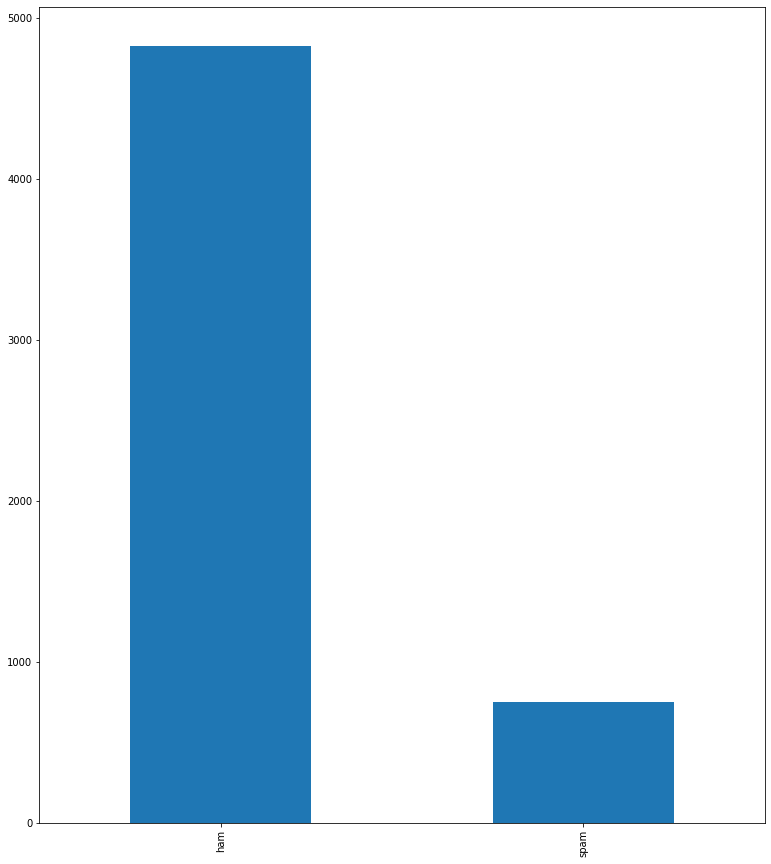

In [54]:
df['class'].value_counts().plot(kind='bar')

**Two categories:**

- ham -> non-spam emails
- spam -> spam emails

### 2. shape

Using **shape**, we can observe the dimensions of the data.

It returns (number of rows, number of columns)

Where,

- number of rows -> number of records in our dataset
- number of columns -> number of features in our dataset

In [55]:
df.shape

(5572, 2)

Number of records: 5572

Number of features: 2

### 3. info

**info()** method shows some of the characteristics of the data such as Column Name, No. of non-null values of our columns, Dtype of the data, and Memory Usage.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   object
 1   email   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<br>
- No missing values in either of the columns


- In real-life scenarios, the data usually has missing values which we need to handle for our model to work accurately. 

(algorithms like K-nearest and naive bayes support data with missing values)

### 4. isnull()

Returns a dataframe object where all the values are replaced with a boolean value True for NULL values, and otherwise False

When combined with .sum() method, it returns the count of null values present in each column

Usage: **dataframe_name.isnull().sum()**

In [57]:
df.isnull().sum()

class    0
email    0
dtype: int64

Different ways to deal with missing values:

- Dropping the missing values

- Replacing with mean or median or mode values

- Predicting the missing values using regression

**Note:** Each method has its own merits and dis-merits
<hr>

**Functions to note:**
    
    
- [isnull()](https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/)
<br><br>
- [notnull()](https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/)
<br><br>
- [dropna()](https://www.geeksforgeeks.org/python-pandas-dataframe-dropna/)
<br><br>
- [fillna()](https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/)
<br><br>
- [replace()](https://www.geeksforgeeks.org/python-pandas-dataframe-replace/)
<br><br>
- [interpolate()](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)

### 5. drop_duplicates()

We can check for duplicate values in our dataset as the presence of duplicate values will hamper the accuracy of our ML model.

and then we can remove duplicate values using drop_duplicates()

In [58]:
df = df.drop_duplicates()

## Important:

There is no defined standard for pre-processing, it mainly depends upon three things (TDM)

1. Task
2. Dataset
3. Model

For example,

- If your dataset has a large number of columns or features, its possible that not every feature contributes much to the outcome of your model, so you would want reduce the number of features.


- If you have continuous variables that have different kinds of numeric ranges, you might wanna apply normalization or standardization.


- If the model that you have chosen is prone to outliers, you will have to detect and remove them, removing the outliers also helps in EDA by giving more accurate graphs etc.



<hr>

## Data Pre-Processing
(for our use-case)
<br><br>

**1. Word tokenization**<br><br>
**2. Removing punctuations**<br><br>
**3. Removing URLs**<br><br>
**4. Removing stop-words**<br><br>
**5. Lower casing**<br><br>
**6. Stemming or lematization**<br><br>
**7. Vectorization**
<hr>

In [59]:
df['email'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: email, dtype: object

In [60]:
email_example = df['email'][0]

In [61]:
print(email_example)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [62]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Step 1: Word Tokenization

In [63]:
from nltk.tokenize import word_tokenize

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
email_cleaned_1 = word_tokenize(email_example)

In [65]:
email_cleaned_1[:10]

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in']

### Step 2: Removing anything other than words

In [66]:
import re

In [67]:
# Removing un-needed unicode characters

email_cleaned_2 = []
for word in email_cleaned_1:
    clean = re.sub(r'[^\w\s]', "", word)
    if clean != "":
        email_cleaned_2.append(clean)

In [68]:
email_cleaned_2[:10]

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n']

### Step 3: Removing any URLs

In [69]:
email_cleaned_3 = []
for word in email_cleaned_2:
    x = re.sub(r'http\S+', '', word)
    if x != '':
        email_cleaned_3.append(x)

In [70]:
email_cleaned_3[:10]

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n']

### Step 4: Stop word removal

(nltk provides stopwords but you can define yours too or find them from the internet)

In [71]:
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
stop_words = stopwords.words('english')

In [73]:
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [74]:
email_cleaned_4 = []
for word in email_cleaned_3:
    if word not in stop_words:
        email_cleaned_4.append(word)

In [75]:
email_cleaned_4[:10]

['Go',
 'jurong',
 'point',
 'crazy',
 'Available',
 'bugis',
 'n',
 'great',
 'world',
 'la']

### Step 5: Lower casing

In [76]:
email_cleaned_5 = []
for word in email_cleaned_4:
    email_cleaned_5.append(word.lower())

In [77]:
email_cleaned_5[0:10]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la']

### Step 6: Lemmatization

In [78]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [79]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [80]:
lemmatizer = WordNetLemmatizer()

In [81]:
email_cleaned_6 = []
for word in email_cleaned_5:
    word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
    email_cleaned_6.append(word)

In [82]:
email_cleaned_6[:10]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la']

#### Defining a clean text function for all the emails now

In [83]:
def clean_text(email):
    
    # tokenization
    email = word_tokenize(email)

    # removing unwanted characters like punctuations
    email = [re.sub(r'[^\w\s]', "", word) for word in email if word != '']

    # url removal
    email = [re.sub(r'http\S+', '', word) for word in email if word != '']

    # stop-word removal
    email = [word for word in email if (word not in stop_words)]

    # lower-casing
    email = [word.lower() for word in email]

    # lemmatization
    email = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in email]
    
    return email

In [84]:
spam_emails_cleaned = df['email'].apply(lambda text: clean_text(text))

In [85]:
spam_emails_cleaned

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, i, nt, think, go, usf, life, around, tho...
                              ...                        
5567    [this, 2nd, time, try, 2, contact, u, u, å750,...
5568               [will, ì_, b, go, esplanade, fr, home]
5569                         [pity, mood, so, suggestion]
5570    [the, guy, bitching, i, act, like, interested,...
5571                               [rofl, it, true, name]
Name: email, Length: 5169, dtype: object

In [86]:
df_spam = df[df['class'] == 'spam'].reset_index()

In [87]:
spam_emails = df_spam['email'].apply(lambda text: clean_text(text))

In [88]:
spam_emails[0:5]

0    [free, entry, 2, wkly, comp, win, fa, cup, fin...
1    [freemsg, hey, darling, 3, week, word, back, i...
2    [winner, a, value, network, customer, select, ...
3    [have, mobile, 11, month, u, r, entitle, updat...
4    [six, chance, win, cash, from, 100, 20000, pou...
Name: email, dtype: object

In [89]:
df_ham = df[df['class'] == 'ham'].reset_index()

In [90]:
ham_emails = df_ham['email'].apply(lambda text: clean_text(text))

In [91]:
ham_emails[5]

['a',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune']

In [92]:
ham_emails[0:5]

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2        [u, dun, say, early, hor, u, c, already, say]
3    [nah, i, nt, think, go, usf, life, around, tho...
4    [even, brother, like, speak, they, treat, like...
Name: email, dtype: object

## Exploratory Data Analysis

###  Spam

In [93]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

matplotlib.rcParams['figure.figsize'] = (20, 13)

In [94]:
sns.set(style='darkgrid')

In [95]:
word_length_spam = [len(words) for words in spam_emails]

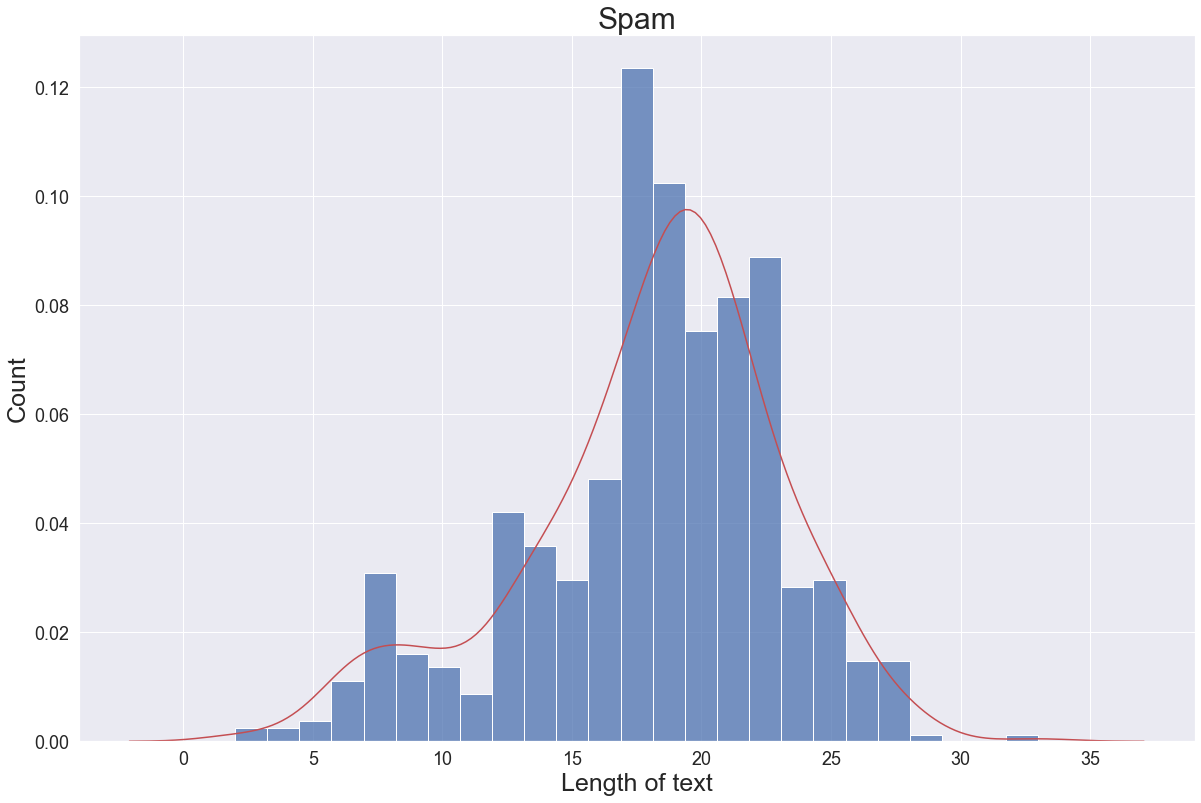

In [96]:
sns.histplot(data=word_length_spam, bins=25, stat='density')
sns.kdeplot(data=word_length_spam, color='r')
plt.title('Spam', fontsize=30)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('Length of text', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

In [97]:
words_spam = []
for words in spam_emails:
    words_spam += words

In [98]:
(pd.Series(nltk.ngrams(words_spam, 1)).value_counts())[:12]

(call,)      321
(free,)      191
(2,)         157
(u,)         142
(txt,)       130
(text,)      121
(ur,)        119
(mobile,)    114
(stop,)      106
(reply,)     103
(4,)         100
(claim,)      98
dtype: int64

In [99]:
(pd.Series(nltk.ngrams(words_spam, 2)).value_counts())[:12]

(t, c)                 60
(please, call)         40
(contact, u)           25
(try, contact)         23
(customer, service)    22
(to, claim)            22
(we, try)              21
(guaranteed, call)     21
(your, mobile)         21
(prize, guaranteed)    20
(po, box)              20
(await, collection)    19
dtype: int64

In [100]:
(pd.Series(nltk.ngrams(words_spam, 3)).value_counts())[:12]

(prize, guaranteed, call)     19
(we, try, contact)            18
(urgent, your, mobile)        17
(reply, call, 08000930705)    14
(private, your, 2003)         13
(your, 2003, account)         13
(2003, account, statement)    13
(this, 2nd, attempt)          12
(t, c, apply)                 12
(show, 800, unredeemed)       12
(land, line, claim)           12
(call, customer, service)     12
dtype: int64

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

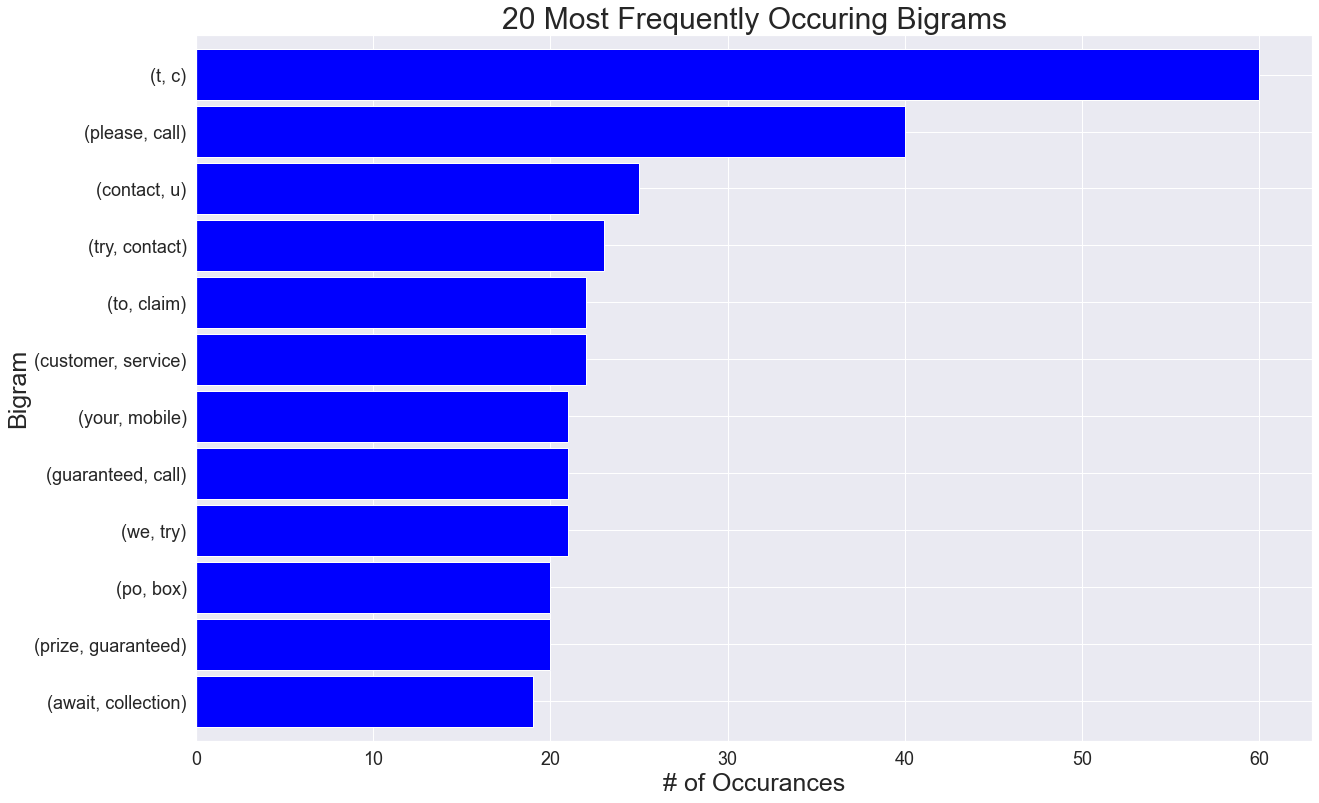

In [101]:
bigrams_series_spam = (pd.Series(nltk.ngrams(words_spam, 2)).value_counts())[:12]
trigrams_series_spam = (pd.Series(nltk.ngrams(words_spam, 3)).value_counts())[:12]

bigrams_series_spam.sort_values().plot.barh(color='blue', width=.9)
plt.title('20 Most Frequently Occuring Bigrams', fontsize=30)
plt.xlabel('# of Occurances', fontsize=25)
plt.ylabel('Bigram', fontsize=25)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

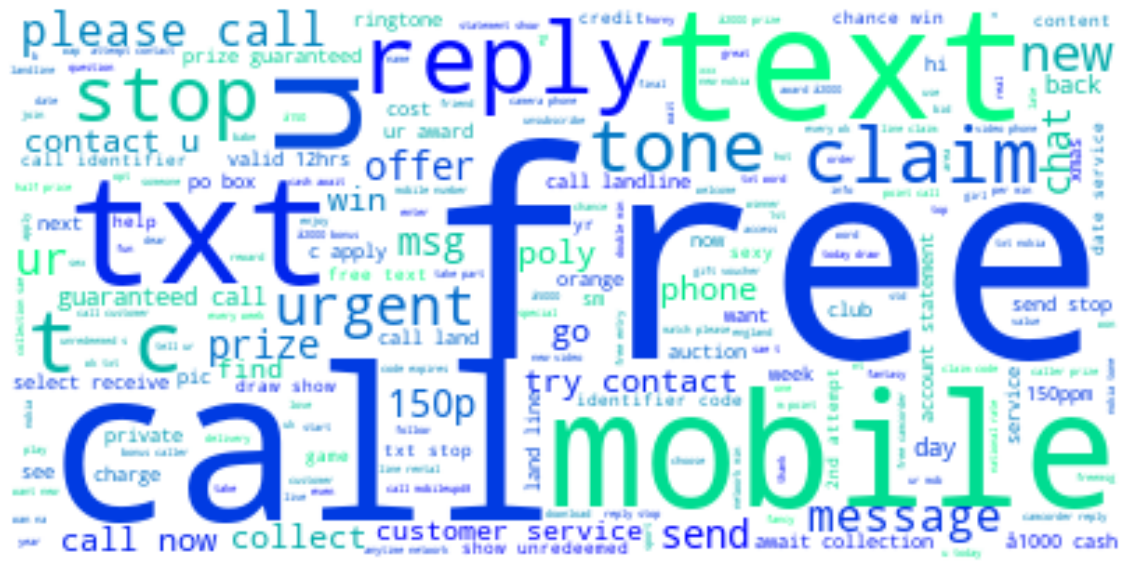

In [102]:
word_cloud = WordCloud( background_color='white', colormap='winter')
word_cloud.generate(','.join(words_spam))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Ham

In [103]:
word_length_ham = [len(words) for words in ham_emails]

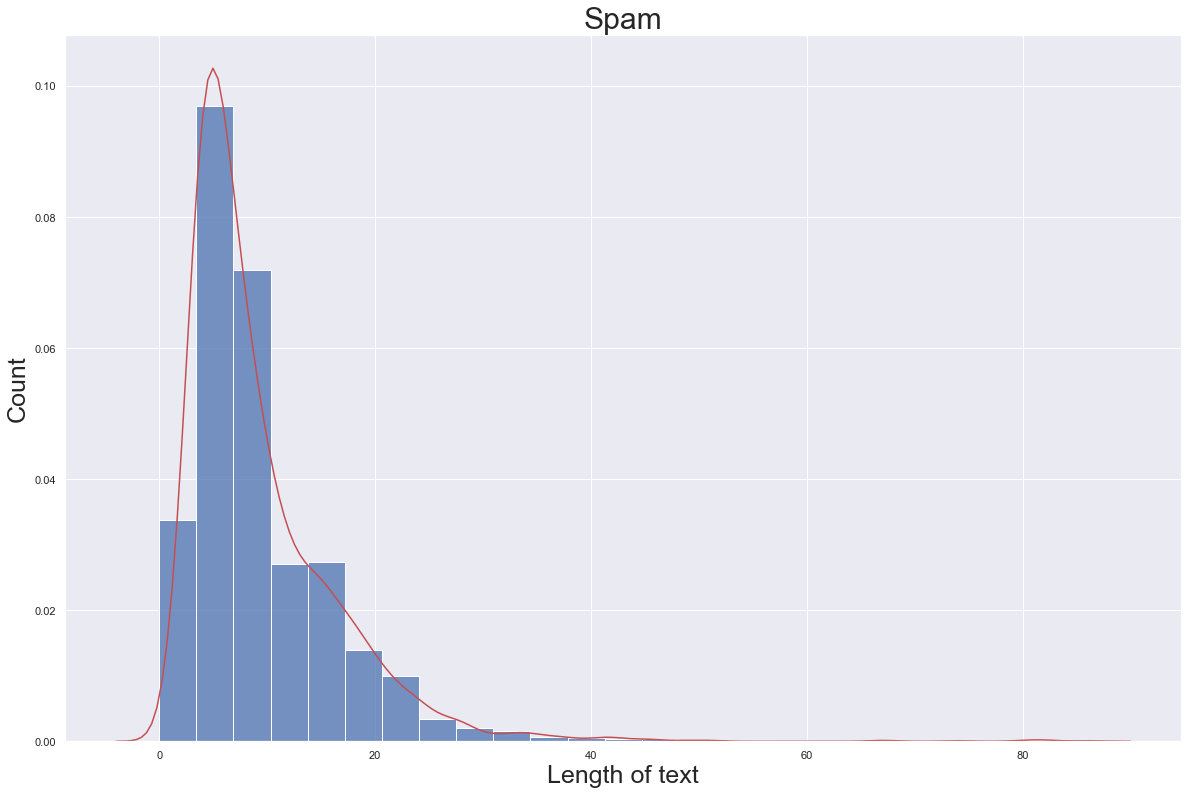

In [104]:
sns.histplot(data=word_length_ham, bins=25, stat='density')
sns.kdeplot(data=word_length_ham, color='r')
plt.title('Spam', fontsize=30)
plt.xlabel('Length of text', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

In [105]:
words_ham = []
for words in ham_emails:
    words_ham += words

In [106]:
(pd.Series(nltk.ngrams(words_ham, 1)).value_counts())[:12]

(i,)       1786
(u,)        956
(get,)      591
(go,)       495
(nt,)       352
(come,)     298
(2,)        290
(gt,)       288
(lt,)       287
(ok,)       251
(be,)       241
(do,)       239
dtype: int64

In [107]:
(pd.Series(nltk.ngrams(words_ham, 2)).value_counts())[:12]

(lt, gt)       254
(i, nt)         71
(i, get)        66
(gon, na)       58
(ca, nt)        57
(i, think)      56
(i, go)         52
(i, want)       52
(i, need)       45
(i, love)       45
(i, know)       42
(let, know)     41
dtype: int64

In [108]:
(pd.Series(nltk.ngrams(words_ham, 3)).value_counts())[:12]

(i, ca, nt)           26
(u, wan, 2)           21
(lt, gt, min)         19
(i, gon, na)          18
(lt, decimal, gt)     18
(happy, new, year)    17
(like, lt, gt)        14
(lt, gt, i)           14
(i, call, later)      12
(hi, hi, hi)          11
(how, go, day)        11
(wat, time, u)         8
dtype: int64

Text(0.5, 0, 'No. of Occurances')

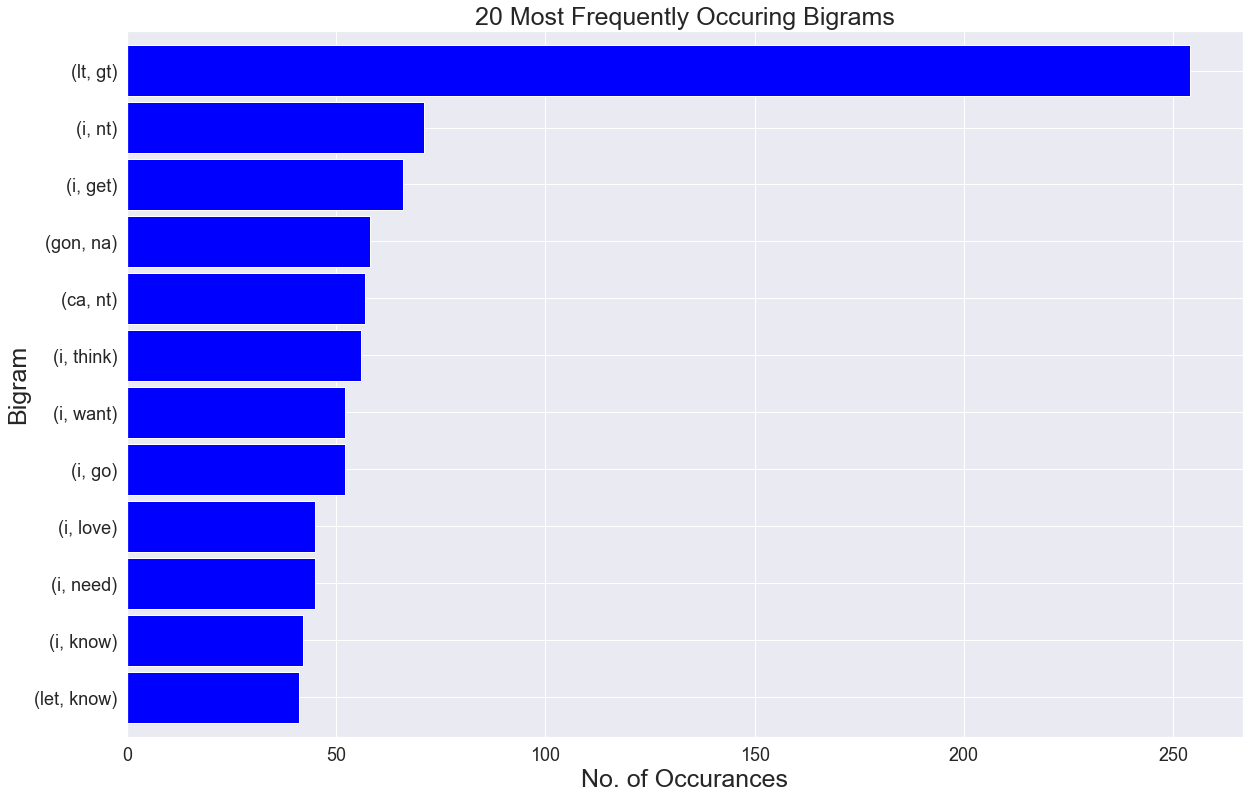

In [109]:
bigrams_series_ham = (pd.Series(nltk.ngrams(words_ham, 2)).value_counts())[:12]
trigrams_series_ham = (pd.Series(nltk.ngrams(words_ham, 3)).value_counts())[:12]

bigrams_series_ham.sort_values().plot.barh(color='blue', width=.9)
plt.title('20 Most Frequently Occuring Bigrams', fontsize=25)
plt.ylabel('Bigram', fontsize=25)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('No. of Occurances', fontsize=25)

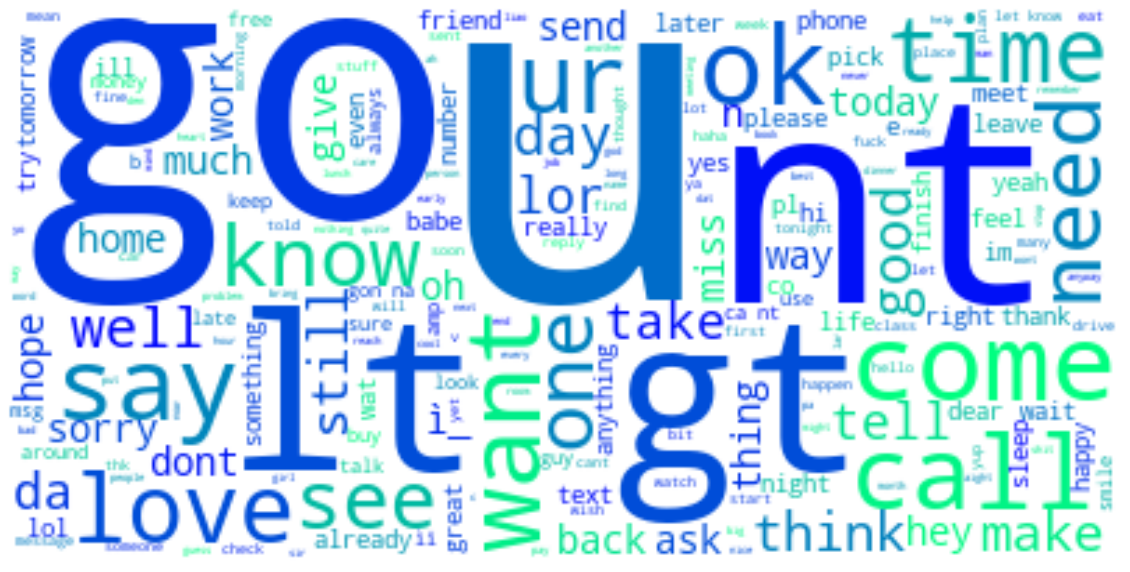

In [110]:
word_cloud = WordCloud( background_color='white', colormap='winter')
word_cloud.generate(','.join(words_ham))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Model

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

In [112]:
vectorizer = CountVectorizer()

In [113]:
X = df['email'].apply(lambda text: " ".join(clean_text(text)))

In [114]:
X.values

array(['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
       'ok lar joking wif u oni',
       'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate t c apply 08452810075over18',
       ..., 'pity mood so suggestion',
       'the guy bitching i act like interested buying something else next week give u free',
       'rofl it true name'], dtype=object)

In [115]:
counts = vectorizer.fit_transform(X.values)

In [116]:
targets = df['class']

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(counts, targets, test_size=0.33, random_state=42)

### Training the model

In [119]:
from sklearn.naive_bayes import MultinomialNB

In [120]:
model = MultinomialNB()

In [121]:
model.fit(X_train, y_train)

MultinomialNB()

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
y_predict = model.predict(X_test)

In [124]:
from sklearn.metrics import f1_score

In [127]:
f1_score(y_test, y_predict, average='weighted')

0.977725674091442

### Testing the model

In [128]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.977725674091442


In [129]:
example = '''
Hi Siddhant,
 
Shop for digital gold on Tata Neu and get 5% extra
up to ₹100 till 15th June, 2022.
 
Your extra gold will arrive in your account within
30 days of purchase.
'''

In [130]:
example = [" ".join(clean_text(example))]

In [131]:
example

['hi siddhant shop digital gold tata neu get 5 extra 100 till 15th june 2022 your extra gold arrive account within 30 day purchase']

In [132]:
example_counts = vectorizer.transform(example)

In [133]:
example_counts

<1x8017 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [134]:
predictions = model.predict(example_counts)
print(predictions)

['spam']


### Saving the model

In [135]:
from joblib import dump, load

In [136]:
dump((model, vectorizer), 'app/static/model.joblib')

['app/static/model.joblib']